In [1]:
import os
os.chdir('C:\\Users\\SHAILESH TIWARI\\Downloads\\Classification')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('vehicle-coupon-recommendation.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Recommend
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friends,Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friends,Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Recommend
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [6]:
data.shape

(12684, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [8]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Recommend
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Recommend'],
      dtype='object')

In [10]:
s1=data.dtypes
s1.groupby(s1).count()

int64      8
object    18
dtype: int64

In [11]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Recommend                int64
dtype: object

In [12]:
data.isnull().sum().sort_values(ascending = False).head(20)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
dtype: int64

In [13]:
#corr_matrix = data.corr(method='pearson')
#corr_matrix['Y'].sort_values(kind="quicksort")

In [14]:
data.apply(lambda x: len(x.unique()))

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      6
Bar                      6
CoffeeHouse              6
CarryAway                6
RestaurantLessThan20     6
Restaurant20To50         6
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Recommend                2
dtype: int64

In [15]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable destination
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

Frequency of Categories for variable passanger
Alone      7305
Friends    3298
Partner    1075
Kids       1006
Name: passanger, dtype: int64

Frequency of Categories for variable weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

Frequency of Categories for variable time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

Frequency of Categories for variable coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

Frequency of Categories for variable expiration
1d    7091
2h    5593
Name: expiration, dtype: int64

Frequency of Categories for variable gender
Female    6511
Male      6173
Name: gender, dtype: int64

Frequency of Categories f

In [16]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(6)

,Total,%
car,12576,99.1
CoffeeHouse,217,1.7
Restaurant20To50,189,1.5
CarryAway,151,1.2
RestaurantLessThan20,130,1.0
Bar,107,0.8


In [17]:
#dropping the column
data.drop(['car'], axis = 1, inplace = True)

In [18]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Recommend
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friends,Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friends,Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [19]:
#check for missing value, unique etc
FileNameDesc = pd.DataFrame(columns = ['column_name','missing_count','percent_missing','unique_count'])
for col in list(data.columns.values):
    sum_missing = data[col].isnull().sum()
    percent_missing = sum_missing/len(data)*100
    uniq_count = (data.groupby([col])[col].count()).count()
    FileNameDesc = FileNameDesc.append({'column_name':col,'missing_count':sum_missing,
                                        'percent_missing':percent_missing,'unique_count':uniq_count},
                                       ignore_index = True)

In [20]:
FileNameDesc

,column_name,missing_count,percent_missing,unique_count
0,destination,0,0.000000,3
1,passanger,0,0.000000,4
2,weather,0,0.000000,3
3,temperature,0,0.000000,3
4,time,0,0.000000,5
5,coupon,0,0.000000,5
6,expiration,0,0.000000,2
7,gender,0,0.000000,2
8,age,0,0.000000,8
9,maritalStatus,0,0.000000,5


In [21]:
#dummies method to populate categorical variable without dummy variable trap at last
#data = pd.get_dummies(data, columns=['destination'], drop_first=True)

In [22]:
#data

In [23]:
'''
#find and replace method to change categorical variable when there are only two to be replaced
data['has_children'].value_counts()
new_replace={'destination':{'No Urgent Place':0,'Home':1,'Work':2},
            "passanger":{'Alone':0,'Friend(s)':1,'Partner':2,'kid(s)':3},
            'weather':{'Sunny':0,'Snowy':1,'Rainy':2},
            'time':{'6PM':3,'7AM':0,'10AM':1,'2PM':2,'10PM':4},
            'expiration':{'1d':1,'2h':0},
            'gender':{'Female':0,'Male':1},
           'maritalStatus':{'Married partner':0,'Single':1,'Unmarried partner':2,'Divorced':3,'Widowed':4}}
data=data.replace(new_replace)
data.head()'''

'\n#find and replace method to change categorical variable when there are only two to be replaced\ndata[\'has_children\'].value_counts()\nnew_replace={\'destination\':{\'No Urgent Place\':0,\'Home\':1,\'Work\':2},\n            "passanger":{\'Alone\':0,\'Friend(s)\':1,\'Partner\':2,\'kid(s)\':3},\n            \'weather\':{\'Sunny\':0,\'Snowy\':1,\'Rainy\':2},\n            \'time\':{\'6PM\':3,\'7AM\':0,\'10AM\':1,\'2PM\':2,\'10PM\':4},\n            \'expiration\':{\'1d\':1,\'2h\':0},\n            \'gender\':{\'Female\':0,\'Male\':1},\n           \'maritalStatus\':{\'Married partner\':0,\'Single\':1,\'Unmarried partner\':2,\'Divorced\':3,\'Widowed\':4}}\ndata=data.replace(new_replace)\ndata.head()'

In [24]:
df1=data['temperature']
data.drop(['temperature'], axis = 1, inplace = True)
data=pd.concat([data,df1],axis=1)

In [25]:
df1=data['has_children']
data.drop(['has_children'], axis = 1, inplace = True)
data=pd.concat([data,df1],axis=1)

In [26]:
df1=data['Recommend']
data.drop(['Recommend'], axis = 1, inplace = True)
data=pd.concat([data,df1],axis=1)

In [27]:
data

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,temperature,has_children,Recommend
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,...,4~8,1~3,1,0,0,0,1,55,1,1
1,No Urgent Place,Friends,Sunny,10AM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,...,4~8,1~3,1,0,0,0,1,80,1,0
2,No Urgent Place,Friends,Sunny,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,...,4~8,1~3,1,1,0,0,1,80,1,1
3,No Urgent Place,Friends,Sunny,2PM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,...,4~8,1~3,1,1,0,0,1,80,1,0
4,No Urgent Place,Friends,Sunny,2PM,Coffee House,1d,Female,21,Unmarried partner,Some college - no degree,...,4~8,1~3,1,1,0,0,1,80,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,6PM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,...,4~8,1~3,1,0,0,1,0,55,0,1
12680,Work,Alone,Rainy,7AM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,...,4~8,1~3,1,0,0,0,1,55,0,1
12681,Work,Alone,Snowy,7AM,Coffee House,1d,Male,26,Single,Bachelors degree,...,4~8,1~3,1,0,0,1,0,30,0,0
12682,Work,Alone,Snowy,7AM,Bar,1d,Male,26,Single,Bachelors degree,...,4~8,1~3,1,1,1,0,1,30,0,0


In [28]:
#Apply Mode strategy to populate the categorical data
data.groupby('CoffeeHouse').agg({'CoffeeHouse': np.size})

,CoffeeHouse
CoffeeHouse,
1~3,3225
4~8,1784
gt8,1111
less1,3385
never,2962


In [29]:
data["CoffeeHouse"]=data["CoffeeHouse"].fillna('less1')
data["CoffeeHouse"] = data["CoffeeHouse"].astype('category')
data["CoffeeHouse"] = data["CoffeeHouse"].cat.codes

In [30]:
#Apply Mode strategy to populate the categorical data
data.groupby('Bar').agg({'Bar': np.size})

,Bar
Bar,
1~3,2473
4~8,1076
gt8,349
less1,3482
never,5197


In [31]:
data["Bar"]=data["Bar"].fillna('never')
data["Bar"] = data["Bar"].astype('category')
data["Bar"] = data["Bar"].cat.codes

In [32]:
data.groupby('CarryAway').agg({'CarryAway': np.size})

,CarryAway
CarryAway,
1~3,4672
4~8,4258
gt8,1594
less1,1856
never,153


In [33]:
data["CarryAway"]=data["CarryAway"].fillna('1~3')
data["CarryAway"] = data["CarryAway"].astype('category')
data["CarryAway"] = data["CarryAway"].cat.codes

In [34]:
data.groupby('RestaurantLessThan20').agg({'RestaurantLessThan20': np.size})

,RestaurantLessThan20
RestaurantLessThan20,
1~3,5376
4~8,3580
gt8,1285
less1,2093
never,220


In [35]:
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].fillna('1~3')
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].astype('category')
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].cat.codes

In [36]:
data.groupby('Restaurant20To50').agg({'Restaurant20To50': np.size})

,Restaurant20To50
Restaurant20To50,
1~3,3290
4~8,728
gt8,264
less1,6077
never,2136


In [37]:
data["Restaurant20To50"]=data["Restaurant20To50"].fillna('less1')
data["Restaurant20To50"] = data["Restaurant20To50"].astype('category')
data["Restaurant20To50"] = data["Restaurant20To50"].cat.codes

In [38]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
temperature             0
has_children            0
Recommend               0
dtype: int64

In [39]:
#Key data analysis
len(data)
data.head()
data.isnull().any()
data.isnull().sum()

destination             0
passanger               0
weather                 0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
temperature             0
has_children            0
Recommend               0
dtype: int64

In [40]:
data.columns

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'temperature',
       'has_children', 'Recommend'],
      dtype='object')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   time                  12684 non-null  object
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   education             12684 non-null  object
 10  occupation            12684 non-null  object
 11  income                12684 non-null  object
 12  Bar                   12684 non-null  int8  
 13  CoffeeHouse           12684 non-null  int8  
 14  CarryAway             12684 non-null  int8  
 15  RestaurantLessThan20  12684 non-null

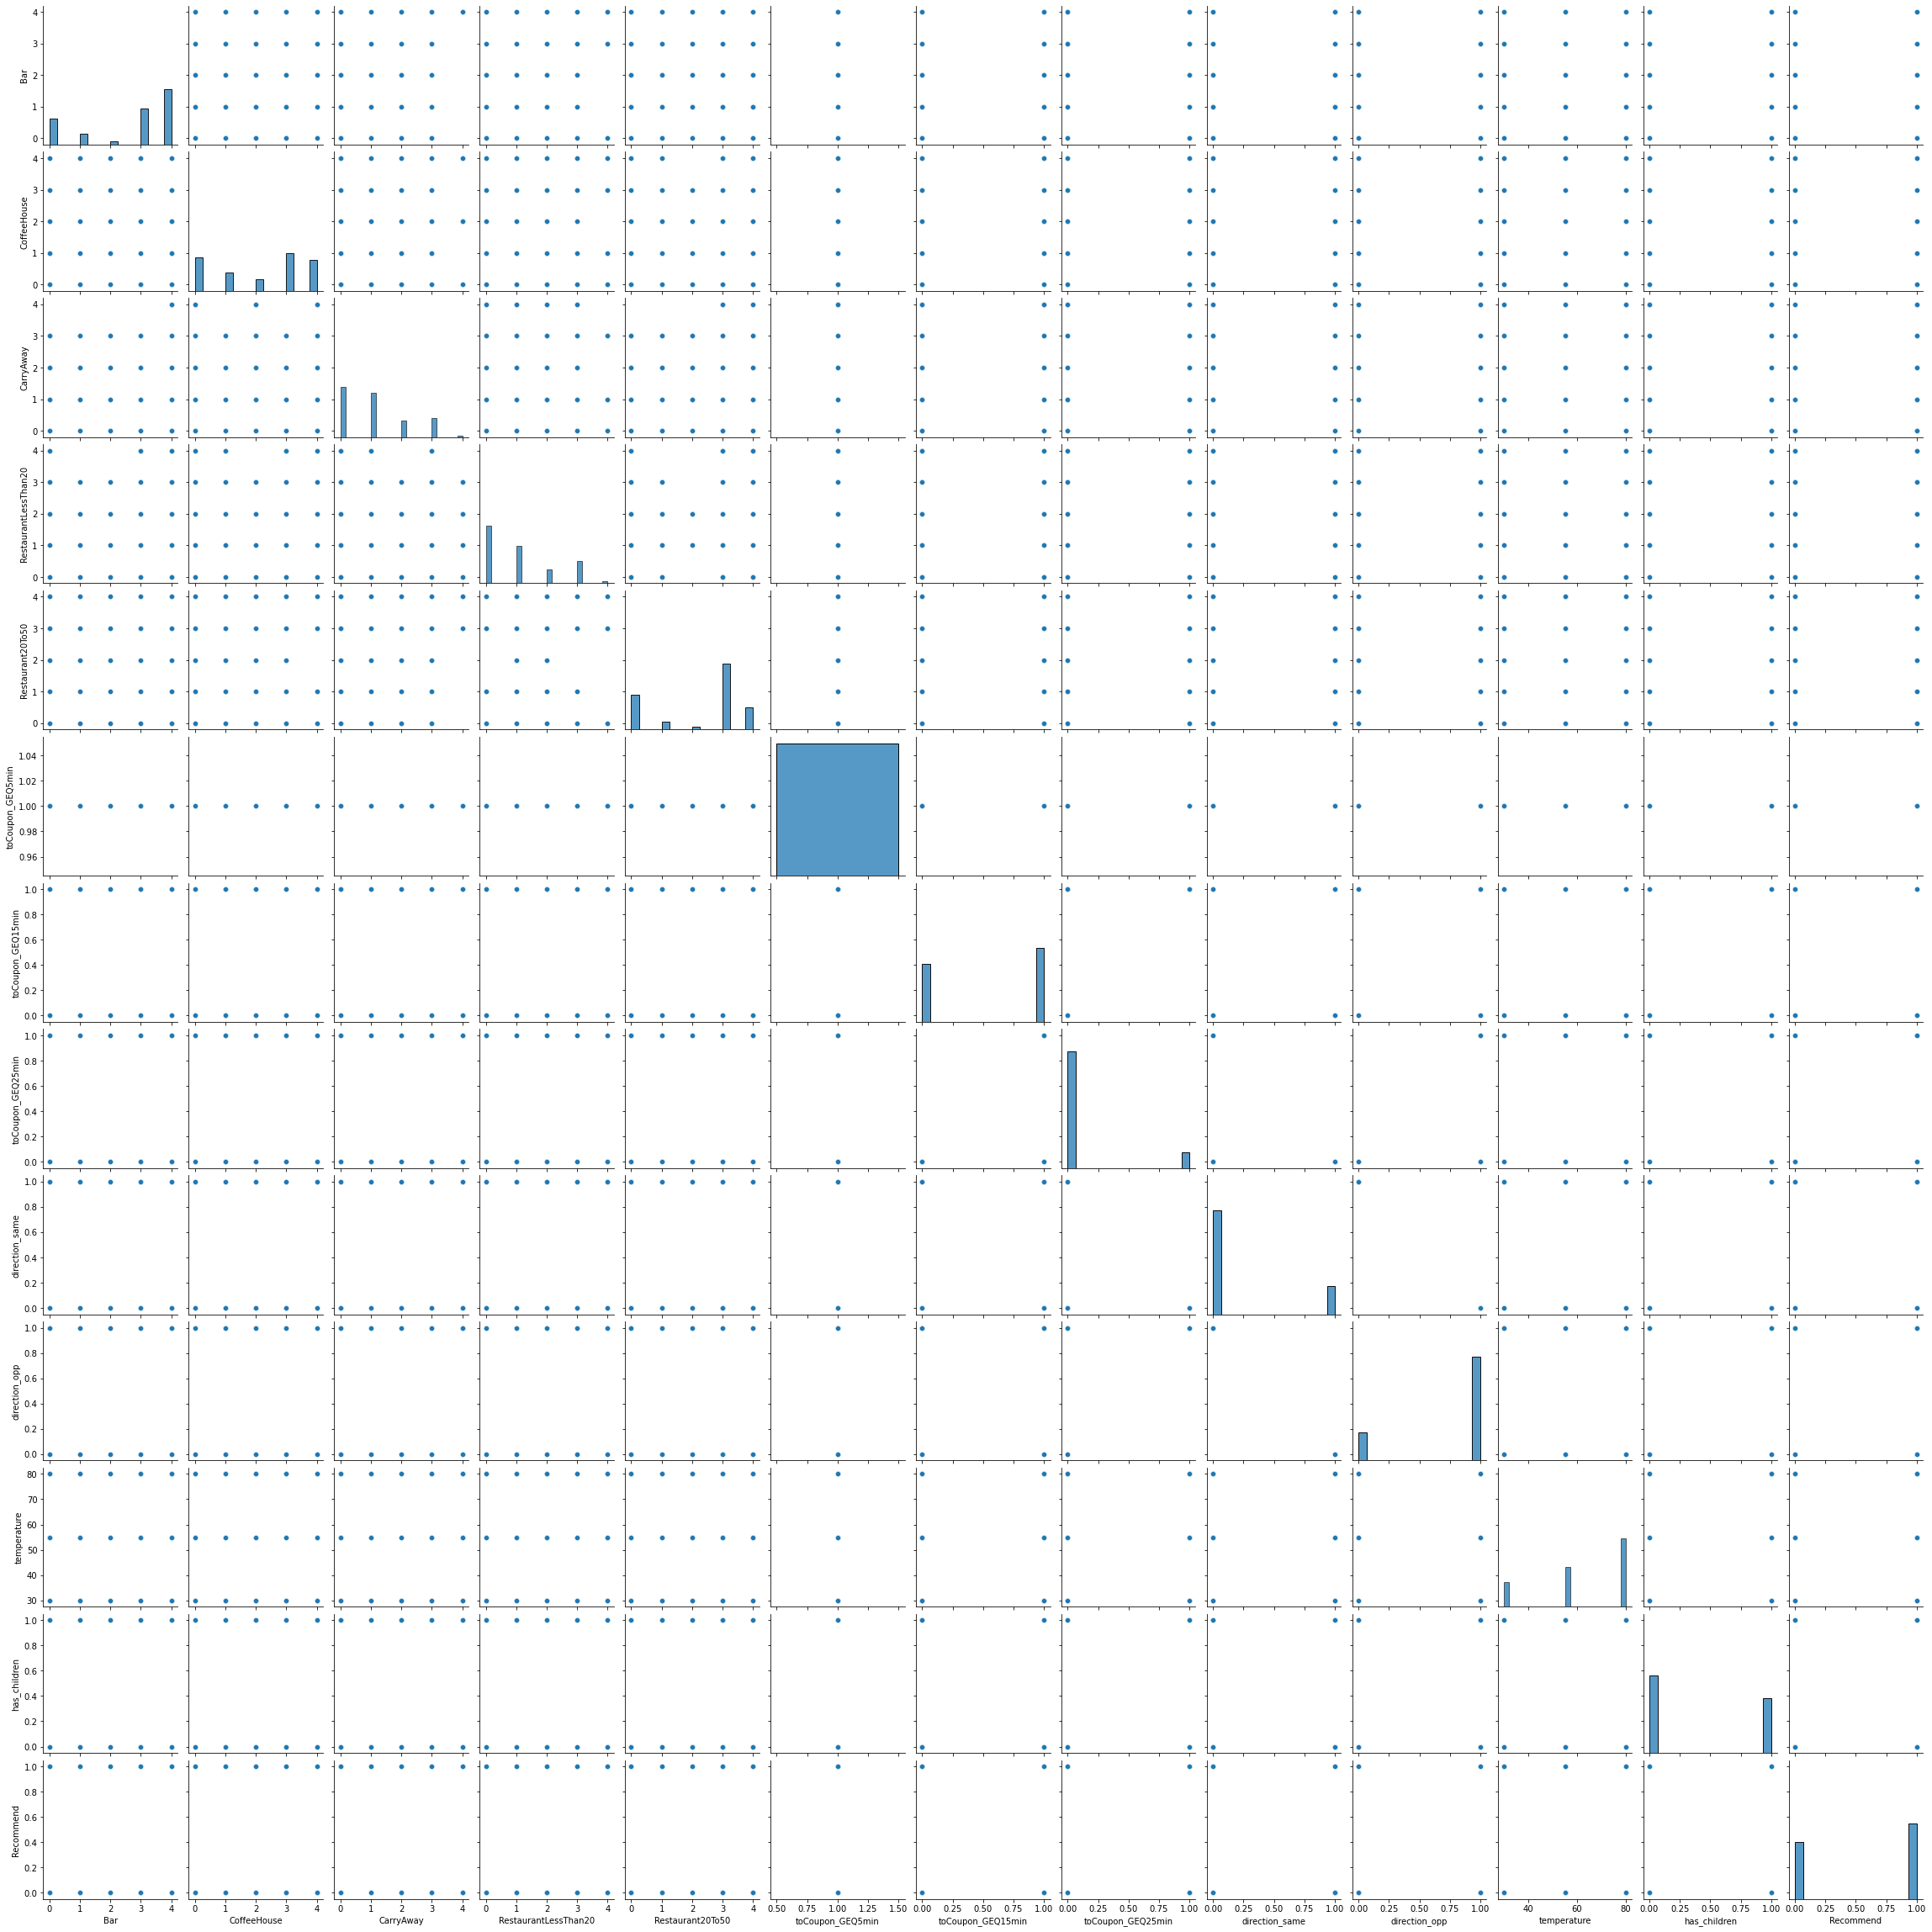

In [42]:
sns.pairplot(data)

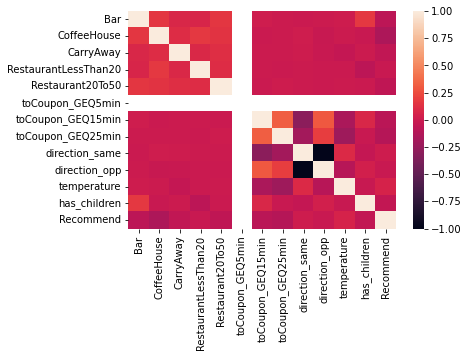

In [43]:
data.corr()
sns.heatmap(data.corr(),annot=False)

In [44]:
data = pd.get_dummies(data, columns=['destination'], drop_first=True)

In [45]:
data.head()

,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,temperature,has_children,Recommend,destination_No Urgent Place,destination_Work
0,Alone,Sunny,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,...,1,0,0,0,1,55,1,1,1,0
1,Friends,Sunny,10AM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,...,1,0,0,0,1,80,1,0,1,0
2,Friends,Sunny,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,...,1,1,0,0,1,80,1,1,1,0
3,Friends,Sunny,2PM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,...,1,1,0,0,1,80,1,0,1,0
4,Friends,Sunny,2PM,Coffee House,1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,...,1,1,0,0,1,80,1,0,1,0


In [46]:
data = pd.get_dummies(data, columns=['passanger'], drop_first=True)

In [47]:
data = pd.get_dummies(data, columns=['weather'], drop_first=True)

In [48]:
data = pd.get_dummies(data, columns=['time'], drop_first=True)

In [49]:
data = pd.get_dummies(data, columns=['coupon'], drop_first=True)

In [50]:
data = pd.get_dummies(data, columns=['expiration'], drop_first=True)

In [51]:
data = pd.get_dummies(data, columns=['gender'], drop_first=True)

In [52]:
data = pd.get_dummies(data, columns=['age'], drop_first=True)

In [53]:
data = pd.get_dummies(data, columns=['maritalStatus'], drop_first=True)

In [54]:
data = pd.get_dummies(data, columns=['education'], drop_first=True)

In [55]:
data = pd.get_dummies(data, columns=['occupation'], drop_first=True)

In [56]:
data = pd.get_dummies(data, columns=['income'], drop_first=True)

In [57]:
data.head()

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,...,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500
0,4,4,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,4,4,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,4,4,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,4,4,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,4,4,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 78 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Bar                                                   12684 non-null  int8 
 1   CoffeeHouse                                           12684 non-null  int8 
 2   CarryAway                                             12684 non-null  int8 
 3   RestaurantLessThan20                                  12684 non-null  int8 
 4   Restaurant20To50                                      12684 non-null  int8 
 5   toCoupon_GEQ5min                                      12684 non-null  int64
 6   toCoupon_GEQ15min                                     12684 non-null  int64
 7   toCoupon_GEQ25min                                     12684 non-null  int64
 8   direction_same                                        12684 non-null  int64


In [59]:
df1=data['Recommend'] # placing recommend at last concatenation

In [60]:
data.drop(['Recommend'], axis = 1, inplace = True)

In [61]:
data=pd.concat([data,df1],axis=1)

In [62]:
data.columns

Index(['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'temperature',
       'has_children', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Friends', 'passanger_Kids', 'passanger_Partner',
       'weather_Snowy', 'weather_Sunny', 'time_10PM', 'time_2PM', 'time_6PM',
       'time_7AM', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_2h',
       'gender_Male', 'age_26', 'age_31', 'age_36', 'age_41', 'age_46',
       'age_50plus', 'age_below21', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',
       'education_High School Graduate', 'education_Some High School',
       'education_

In [63]:
data.shape

(12684, 78)

In [64]:
x = data.iloc[:,0:77].values
y = data.iloc[:,-1:].values

In [65]:
x

array([[4, 4, 0, ..., 0, 0, 0],
       [4, 4, 0, ..., 0, 0, 0],
       [4, 4, 0, ..., 0, 0, 0],
       ...,
       [4, 4, 0, ..., 1, 0, 0],
       [4, 4, 0, ..., 1, 0, 0],
       [4, 4, 0, ..., 1, 0, 0]], dtype=int64)

In [66]:
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [67]:
'''#data preprocessing through column transformer and one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,3,4,5,6,7,8,9,10,11])],remainder='passthrough')
X=np.array(ct.fit_transform(x))
print(X)'''

"#data preprocessing through column transformer and one hot encoding\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,3,4,5,6,7,8,9,10,11])],remainder='passthrough')\nX=np.array(ct.fit_transform(x))\nprint(X)"

In [68]:
X=pd.DataFrame(x)

In [69]:
x

array([[4, 4, 0, ..., 0, 0, 0],
       [4, 4, 0, ..., 0, 0, 0],
       [4, 4, 0, ..., 0, 0, 0],
       ...,
       [4, 4, 0, ..., 1, 0, 0],
       [4, 4, 0, ..., 1, 0, 0],
       [4, 4, 0, ..., 1, 0, 0]], dtype=int64)

In [70]:
#standard scaling
from sklearn.preprocessing import StandardScaler    # to make the data in  standard format to read
sc = StandardScaler()
x=sc.fit_transform(x)

In [71]:
x

array([[ 0.87907353,  1.23417927, -0.98301928, ..., -0.2691864 ,
        -0.27553263, -0.29917139],
       [ 0.87907353,  1.23417927, -0.98301928, ..., -0.2691864 ,
        -0.27553263, -0.29917139],
       [ 0.87907353,  1.23417927, -0.98301928, ..., -0.2691864 ,
        -0.27553263, -0.29917139],
       ...,
       [ 0.87907353,  1.23417927, -0.98301928, ...,  3.71489795,
        -0.27553263, -0.29917139],
       [ 0.87907353,  1.23417927, -0.98301928, ...,  3.71489795,
        -0.27553263, -0.29917139],
       [ 0.87907353,  1.23417927, -0.98301928, ...,  3.71489795,
        -0.27553263, -0.29917139]])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=0)

In [73]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [74]:
# prediction for x_test
y_pred = logmodel.predict(X_test)

In [75]:
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [76]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [77]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6724477729601892

In [78]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred)

array([[ 610,  501],
       [ 330, 1096]], dtype=int64)

In [79]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.32313151766763293

In [80]:
len(y_test)

2537

In [81]:
# k nearest neighbour  algo applying
from sklearn.neighbors import KNeighborsClassifier
classifier_knn =KNeighborsClassifier(n_neighbors=11,metric='euclidean',p=2)
classifier_knn.fit(X_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [84]:
y_pred_knn = classifier_knn.predict(X_test)

MemoryError: Unable to allocate 196. MiB for an array with shape (2537, 10147) and data type float64

In [85]:
y_pred_knn

NameError: name 'y_pred_knn' is not defined

In [86]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_knn)

NameError: name 'y_pred_knn' is not defined

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)

NameError: name 'y_pred_knn' is not defined

In [89]:
# naiye baise algo application
from sklearn.naive_bayes import GaussianNB
classifier_nb =GaussianNB()
classifier_nb.fit(X_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [90]:
y_pred_nb = classifier_nb.predict(X_test)

In [91]:
y_pred_nb

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [92]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_nb)

array([[699, 412],
       [521, 905]], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_nb)

0.632242806464328

In [95]:
# support vector machine application through sigmoid kernel
from sklearn.svm import SVC
classifier_svm_sig = SVC(kernel='sigmoid')
classifier_svm_sig.fit(X_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='sigmoid')

In [96]:
pred_svm_sig = classifier_svm_sig.predict(X_test)

In [97]:
pred_svm_sig

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_svm_sig)

array([[561, 550],
       [467, 959]], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_svm_sig)

0.5991328340559716

In [100]:
# support vector machine application through linear kernel
from sklearn.svm import SVC
classifier_svm_lin = SVC(kernel='linear')
classifier_svm_lin.fit(X_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [101]:
y_pred_svm_lin = classifier_svm_lin.predict(X_test)

In [102]:
y_pred_svm_lin

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_lin)

array([[ 619,  492],
       [ 337, 1089]], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_lin)

0.6732361056365787

In [105]:
# support vector machine application through polynomial kernel
from sklearn.svm import SVC
classifier_svm_poly = SVC(kernel='poly')
classifier_svm_poly.fit(X_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='poly')

In [106]:
y_pred_svm_poly = classifier_svm_poly.predict(X_test)

In [107]:
y_pred_svm_poly

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_poly)

array([[ 631,  480],
       [ 232, 1194]], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_poly)

0.7193535672053607

In [110]:
# support vector machine application through rbf kernel
from sklearn.svm import SVC
classifier_svm_rbf = SVC(kernel='rbf')
classifier_svm_rbf.fit(X_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [111]:
y_pred_svm_rbf = classifier_svm_rbf.predict(X_test)

In [112]:
y_pred_svm_rbf

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_rbf)

array([[ 678,  433],
       [ 249, 1177]], dtype=int64)

In [114]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_rbf)

0.7311785573512022

In [115]:
#running decision tree algo
from sklearn.tree import DecisionTreeClassifier
classifier_dt =DecisionTreeClassifier(criterion='entropy') # also can use gini
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [116]:
y_pred_dt =classifier_dt.predict(X_test)

In [117]:
y_pred_dt

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_dt)

array([[ 703,  408],
       [ 408, 1018]], dtype=int64)

In [119]:
# accuracy score calculation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dt)

0.67836026803311

In [120]:
# running random forest algorithm
from sklearn.ensemble import RandomForestClassifier
classifier_rf =RandomForestClassifier(n_estimators=3, criterion='entropy')
classifier_rf.fit(X_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(criterion='entropy', n_estimators=3)

In [121]:
y_pred_rf =classifier_rf.predict(X_test)

In [122]:
y_pred_rf

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_rf)

array([[ 664,  447],
       [ 351, 1075]], dtype=int64)

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.6854552621206149

In [125]:
#start predicting with the best model by feeding new data by creating file